In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
cn = '195At'
bf = 0.64
ch = 'xn'
sigr = 2.5
bf_diff = 0.01

proj_ship = '51V'
trg_ship = '144Sm'

df10_mb_ship = pd.read_csv('data/' + proj_ship + '_' + trg_ship + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb_ship = pd.read_csv('data/' + proj_ship + '_' + trg_ship + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_10_mb_ship = pd.read_csv('data/' + proj_ship + '_' + trg_ship + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_10_mb_ship = pd.read_csv('data/' + proj_ship + '_' + trg_ship + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_0_mb_ship = pd.read_csv('data/' + proj_ship + '_' + trg_ship + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_0_mb_ship = pd.read_csv('data/' + proj_ship + '_' + trg_ship + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

proj_ritu = '54Fe'
trg_ritu = '141Pr'

df10_mb_ritu = pd.read_csv('data/' + proj_ritu + '_' + trg_ritu + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb_ritu = pd.read_csv('data/' + proj_ritu + '_' + trg_ritu + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_10_mb_ritu = pd.read_csv('data/' + proj_ritu + '_' + trg_ritu + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_10_mb_ritu = pd.read_csv('data/' + proj_ritu + '_' + trg_ritu + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_0_mb_ritu = pd.read_csv('data/' + proj_ritu + '_' + trg_ritu + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_0_mb_ritu = pd.read_csv('data/' + proj_ritu + '_' + trg_ritu + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')


## Experimental values with errors

In [33]:
# # Folden, in mb
# e_lab = [180.3,188.4,196.5,202.6,208.6,213.3,218.5]
# exp = [[np.nan,np.nan,np.nan,0.1,0.21,0.18,0.08], [0.2,1.21,2.29,1.54,0.73,0.28,0.1], [9.1,5,1.19,0.13,np.nan,np.nan,np.nan]]
# err = [[np.nan,np.nan,np.nan,0.05,0.08,0.07,0.03], [0.12,0.43,0.8,0.54,0.26,0.1,0.04], [3.3,1.8,0.44,0.06,np.nan,np.nan,np.nan]]


## Scaling of the values to mb, ub or nb

In [34]:
dfm10_mb_ship = df10_mb_ship.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb_ship = df0_mb_ship.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10_ship = dfm10_mb_ship
dfm0_ship = dfm0_mb_ship
df10_ship = df10_mb_ship
df0_ship = df0_mb_ship
bf_low_10_ship = bf_low_10_mb_ship
bf_high_10_ship = bf_high_10_mb_ship
bf_low_0_ship = bf_low_0_mb_ship
bf_high_0_ship = bf_high_0_mb_ship

mb = 1
ub = 1e3
nb = 1e6

scale = ub

dfm10_ship['CS'] = dfm10_mb_ship['CS']*scale
dfm0_ship['CS'] = dfm0_mb_ship['CS']*scale
df10_ship.iloc[:,2:] = df10_mb_ship.iloc[:,2:] * scale
df0_ship.iloc[:,2:] = df0_mb_ship.iloc[:,2:] * scale
bf_low_10_ship.iloc[:,2:] = bf_low_10_mb_ship.iloc[:,2:] * scale
bf_high_10_ship.iloc[:,2:] = bf_high_10_mb_ship.iloc[:,2:] * scale
bf_low_0_ship.iloc[:,2:] = bf_low_0_mb_ship.iloc[:,2:] * scale
bf_high_0_ship.iloc[:,2:] = bf_high_0_mb_ship.iloc[:,2:] * scale
try:
    exp = exp * scale
except NameError:
    print('No exp. values')

No exp. values


In [35]:
dfm10_mb_ritu = df10_mb_ritu.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb_ritu = df0_mb_ritu.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10_ritu = dfm10_mb_ritu
dfm0_ritu = dfm0_mb_ritu
df10_ritu = df10_mb_ritu
df0_ritu = df0_mb_ritu
bf_low_10_ritu = bf_low_10_mb_ritu
bf_high_10_ritu = bf_high_10_mb_ritu
bf_low_0_ritu = bf_low_0_mb_ritu
bf_high_0_ritu = bf_high_0_mb_ritu

dfm10_ritu['CS'] = dfm10_mb_ritu['CS']*scale
dfm0_ritu['CS'] = dfm0_mb_ritu['CS']*scale
df10_ritu.iloc[:,2:] = df10_mb_ritu.iloc[:,2:] * scale
df0_ritu.iloc[:,2:] = df0_mb_ritu.iloc[:,2:] * scale
bf_low_10_ritu.iloc[:,2:] = bf_low_10_mb_ritu.iloc[:,2:] * scale
bf_high_10_ritu.iloc[:,2:] = bf_high_10_mb_ritu.iloc[:,2:] * scale
bf_low_0_ritu.iloc[:,2:] = bf_low_0_mb_ritu.iloc[:,2:] * scale
bf_high_0_ritu.iloc[:,2:] = bf_high_0_mb_ritu.iloc[:,2:] * scale
try:
    exp = exp * scale
except NameError:
    print('No exp. values')

dfm10_ship[dfm10_ship['isotope'].isin(list(df10_ship.columns[0:]))]

No exp. values


,E_lab,E*/MeV,isotope,CS
0,204.047,20.0,188At,0.0
1,205.402,21.0,188At,0.0
2,206.756,22.0,188At,0.0
3,208.110,23.0,188At,0.0
4,209.464,24.0,188At,0.0
...,...,...,...,...
563,293.422,86.0,195At,0.0
564,294.777,87.0,195At,0.0
565,296.131,88.0,195At,0.0
566,297.485,89.0,195At,0.0


## Plotting

/tmp/ipykernel_189404/267031746.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm10_ship[dfm10_ship['isotope'].isin(list(df10_ship.columns[plot_from_ship:plot_from_ship+2]))], palette=colors, label='x', legend=False)
/tmp/ipykernel_189404/267031746.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm0_ship[dfm0_ship['isotope'].isin(list(df0_ship.columns[plot_from_ship:plot_from_ship+2]))], palette=colors, ls=':', legend=False)


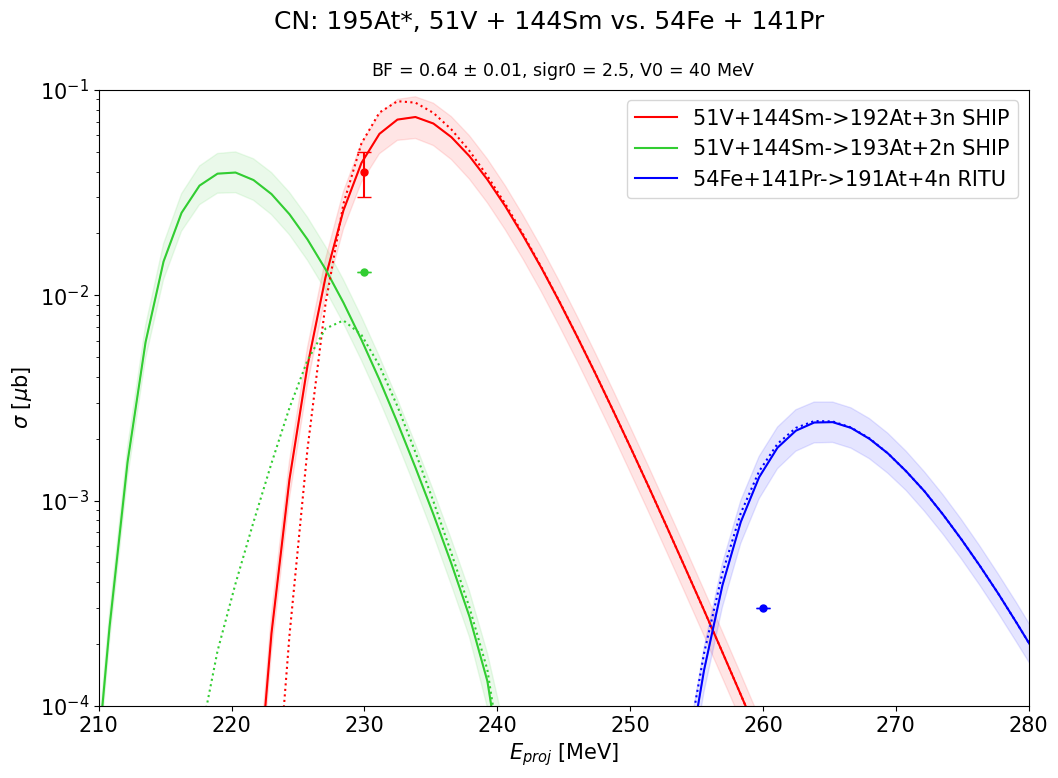

In [39]:
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']

plot_from_ship = 6
plot_from_ritu = 5

# frame = 'E*/MeV'
frame = 'E_lab'

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm10_ship[dfm10_ship['isotope'].isin(list(df10_ship.columns[plot_from_ship:plot_from_ship+2]))], palette=colors, label='x', legend=False)
sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm0_ship[dfm0_ship['isotope'].isin(list(df0_ship.columns[plot_from_ship:plot_from_ship+2]))], palette=colors, ls=':', legend=False)

sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm10_ritu[dfm10_ritu['isotope'].isin(list(df10_ritu.columns[plot_from_ritu:plot_from_ritu+1]))], palette=[colors[2]], label='x', legend=False)
sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm0_ritu[dfm0_ritu['isotope'].isin(list(df0_ritu.columns[plot_from_ritu:plot_from_ritu+1]))], palette=[colors[2]], ls=':', legend=False)

plt.semilogy()
plt.ylim(1e-4, 1e-1)
if frame == 'E_lab':
    plt.xlabel('$E_{proj}$ [MeV]')
    plt.xlim(210, 280)
elif frame == 'E*/MeV':
    plt.xlabel('$E*$ [MeV]')
    plt.xlim(30, 65)
plt.suptitle('CN: ' + cn + '*, ' + proj_ship + ' + ' + trg_ship + ' vs. ' + proj_ritu + ' + ' + trg_ritu)# + '; BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr))#, va='top')
plt.title('BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr) + ', V0 = 40 MeV', va='bottom', fontsize='small')
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.legend(loc='upper right')

exp_ship_192at = 40*1e-6*scale
exp_ship_193at = 13*1e-6*scale
exp_ritu = 300*1e-9*scale

label_192at = '51V+144Sm->192At+3n SHIP'
label_193at = '51V+144Sm->193At+2n SHIP'
label_ritu = '54Fe+141Pr->191At+4n RITU'
new_labels = [label_192at, label_193at, label_ritu]

h, l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=new_labels, loc='upper right')
        
if frame == 'E*/MeV':
    dfm_frame = 1
    E_exp_ship = 39
    E_exp_ritu = 49
    en_frame = 'Eexc'
elif frame == 'E_lab':
    dfm_frame = 0
    E_exp_ship = 230
    E_exp_ritu = 260
    en_frame = 'Elab'

(_, caps_ship_192at, _) = plt.errorbar(E_exp_ship, exp_ship_192at, yerr=exp_ship_192at*0.25, marker='.', capsize=5, color=colors[0], ls='none', markersize=10)
(_, caps_ship_193at, _) = plt.errorbar(E_exp_ship, exp_ship_193at, yerr=exp_ship_193at*0., marker='.', capsize=5, color=colors[1], ls='none', markersize=10)
(_, caps_ritu, _) = plt.errorbar(E_exp_ritu, exp_ritu, yerr=0, marker='.', capsize=5, color=colors[2], ls='none', markersize=10)

alpha_value = 0.1

for i in range(plot_from_ship, plot_from_ship+2):
    plt.fill_between(df10_ship.iloc[:, dfm_frame],  df10_ship.iloc[:, i], bf_low_10_ship.iloc[:, i], color=colors[i-plot_from_ship], alpha = alpha_value)
    plt.fill_between(df10_ship.iloc[:, dfm_frame],  df10_ship.iloc[:, i], bf_high_10_ship.iloc[:, i], color=colors[i-plot_from_ship], alpha = alpha_value)
    # plt.fill_between(df0_ship.iloc[:, 0],  df0_ship.iloc[:, i], bf_low_0_ship.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
    # plt.fill_between(df0_ship.iloc[:, 0],  df0_ship.iloc[:, i], bf_high_0_ship.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
    
for i in range(plot_from_ritu, plot_from_ritu+1):
    plt.fill_between(df10_ritu.iloc[:, dfm_frame],  df10_ritu.iloc[:, i], bf_low_10_ritu.iloc[:, i], color=colors[2], alpha = alpha_value)
    plt.fill_between(df10_ritu.iloc[:, dfm_frame],  df10_ritu.iloc[:, i], bf_high_10_ritu.iloc[:, i], color=colors[2], alpha = alpha_value)
    
for cap in caps_ship_192at:
    cap.set_markeredgewidth(1)
for cap in caps_ship_193at:
    cap.set_markeredgewidth(1)
for cap in caps_ritu:
    cap.set_markeredgewidth(1)
    
plt.rcParams.update({'font.size': 15})

plt.savefig('195At_SHIP_vs_RITU' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_' + en_frame + '.png')
plt.savefig('195At_SHIP_vs_RITU' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_' + en_frame + '.pdf')

In [114]:
df10_ship.iloc[:, 0]

0     204.047
1     205.402
2     206.756
3     208.110
4     209.464
       ...   
66    293.422
67    294.777
68    296.131
69    297.485
70    298.839
Name: E_lab, Length: 71, dtype: float64